In [1]:
pip install tensorflow librosa matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [26]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def save_spectrogram(audio_path, output_path, sr=22050, duration=3):
    # Load audio
    audio, _ = librosa.load(audio_path, sr=sr, duration=duration)
    # Convert to spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)  # Specify `y=audio`
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    # Save as image
    plt.figure(figsize=(2, 2))
    librosa.display.specshow(log_spectrogram, sr=sr, cmap='magma')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Paths
data_folder = r'D:/7 semester/nndl/bird 2/wavfiles'  # replace with your folder
output_folder = 'spectrograms/'
os.makedirs(output_folder, exist_ok=True)

# Convert all audio files to spectrograms
for filename in os.listdir(data_folder):
    if filename.endswith(".wav"):
        audio_path = os.path.join(data_folder, filename)
        output_path = os.path.join(output_folder, filename.replace(".wav", ".png"))
        save_spectrogram(audio_path, output_path)


In [27]:
import os
import shutil

# Paths to the spectrogram folder and output folder
spectrogram_folder = 'spectrograms'  # Replace with your actual folder path
output_folder = 'organized_by_id'
os.makedirs(output_folder, exist_ok=True)

# Iterate over the images in the spectrogram folder
for filename in os.listdir(spectrogram_folder):
    if filename.endswith('.png'):
        # Extract the base ID from the filename (before the first dash)
        base_id = filename.split('-')[0]

        # Create a subfolder for the base ID if it doesn't exist
        id_folder = os.path.join(output_folder, base_id)
        os.makedirs(id_folder, exist_ok=True)

        # Move the image to the ID folder
        image_path = os.path.join(spectrogram_folder, filename)
        shutil.move(image_path, os.path.join(id_folder, filename))

        print(f"Moved {filename} to {id_folder}")

print("Organized images into ID-based folders.")


Moved 101308-0.png to organized_by_id\101308
Moved 101308-1.png to organized_by_id\101308
Moved 101308-10.png to organized_by_id\101308
Moved 101308-11.png to organized_by_id\101308
Moved 101308-12.png to organized_by_id\101308
Moved 101308-13.png to organized_by_id\101308
Moved 101308-2.png to organized_by_id\101308
Moved 101308-3.png to organized_by_id\101308
Moved 101308-4.png to organized_by_id\101308
Moved 101308-5.png to organized_by_id\101308
Moved 101308-6.png to organized_by_id\101308
Moved 101308-7.png to organized_by_id\101308
Moved 101308-8.png to organized_by_id\101308
Moved 101308-9.png to organized_by_id\101308
Moved 101427-0.png to organized_by_id\101427
Moved 101427-1.png to organized_by_id\101427
Moved 101427-10.png to organized_by_id\101427
Moved 101427-11.png to organized_by_id\101427
Moved 101427-2.png to organized_by_id\101427
Moved 101427-3.png to organized_by_id\101427
Moved 101427-4.png to organized_by_id\101427
Moved 101427-5.png to organized_by_id\101427
Move

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the folder where images are organized by ID
organized_folder = r'D:/7 semester/nndl/bird 2/organized_by_id'  # Replace with the correct path to your folder

# Create ImageDataGenerator instances for training and validation
data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Create training generator
train_gen = data_gen.flow_from_directory(
    organized_folder,  # Directory with spectrogram images organized by ID
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=16,
    class_mode='categorical',  # Change to 'binary' if you have only two classes
    subset='training'
)

# Create validation generator
val_gen = data_gen.flow_from_directory(
    organized_folder,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Display the class indices to verify that the data is being loaded correctly
print("Class indices:", train_gen.class_indices)


Found 7604 images belonging to 765 classes.
Found 1503 images belonging to 765 classes.
Class indices: {'101308': 0, '101427': 1, '102948': 2, '103059': 3, '103060': 4, '103338': 5, '103339': 6, '103449': 7, '104527': 8, '104528': 9, '104637': 10, '105818': 11, '109026': 12, '109034': 13, '109035': 14, '109397': 15, '109668': 16, '111287': 17, '111289': 18, '111644': 19, '111645': 20, '111646': 21, '111649': 22, '111650': 23, '111651': 24, '111653': 25, '111654': 26, '111655': 27, '111666': 28, '111667': 29, '111668': 30, '111669': 31, '111670': 32, '111671': 33, '111827': 34, '112078': 35, '112080': 36, '112153': 37, '11713': 38, '11846': 39, '121280': 40, '121281': 41, '125284': 42, '125706': 43, '125711': 44, '125713': 45, '125714': 46, '125717': 47, '125718': 48, '125721': 49, '125723': 50, '12577': 51, '12578': 52, '126478': 53, '126663': 54, '126665': 55, '126673': 56, '126678': 57, '126679': 58, '126683': 59, '126685': 60, '126686': 61, '126691': 62, '126693': 63, '126694': 64, 

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a simple CNN model
def create_model(input_shape=(64, 64, 3), num_classes=3):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Change to 'sigmoid' if binary classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = create_model(input_shape=(64, 64, 3), num_classes=len(train_gen.class_indices))

# Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=20)


Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 134s 278ms/step - accuracy: 0.0019 - loss: 6.6317 - val_accuracy: 0.0126 - val_loss: 6.1388
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 95s 199ms/step - accuracy: 0.0124 - loss: 6.1348 - val_accuracy: 0.0772 - val_loss: 5.1074
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 99s 208ms/step - accuracy: 0.0393 - loss: 5.3483 - val_accuracy: 0.1936 - val_loss: 4.0648
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 165s 346ms/step - accuracy: 0.0891 - loss: 4.6184 - val_accuracy: 0.3713 - val_loss: 3.0626
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 96s 201ms/step - accuracy: 0.1290 - loss: 4.0691 - val_accuracy: 0.4744 - val_loss: 2.6304
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 96s 202ms/step - accuracy: 0.1878 - loss: 3.6415 - val_accuracy: 0.5569 - val_loss: 2.2484
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 98s 206ms/step - accuracy: 0.2369 - loss: 3.2906 - val_accuracy: 0.5921 - val_loss: 1.9435
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 98s 205ms/step - accuracy: 0.2599 - loss:

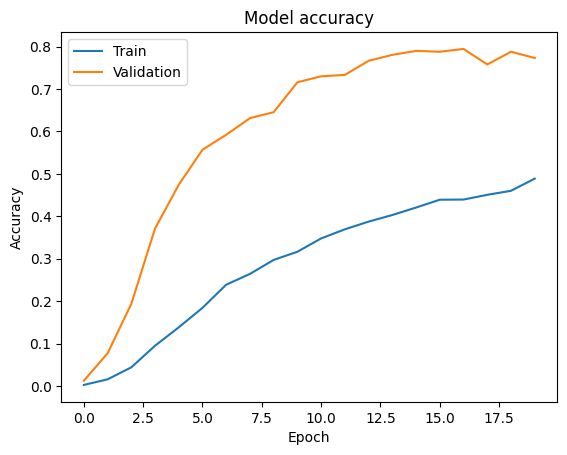

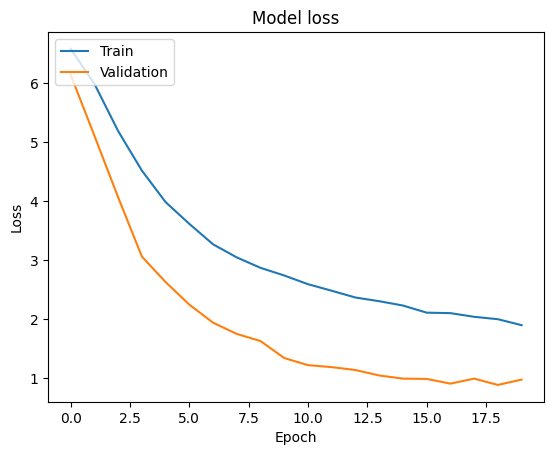

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Optimized CNN Model
def build_optimized_cnn_model(input_shape=(64, 64, 3), num_classes=10):
    model = models.Sequential([
        # Initial Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Regularization for reducing overfitting
        layers.BatchNormalization(),
        
        # Output Layer
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Model Compilation
input_shape = (64, 64, 3)  # Shape of input images
num_classes = train_gen.num_classes  # Number of classes based on the dataset
model = build_optimized_cnn_model(input_shape=input_shape, num_classes=num_classes)

# Compile the model with an optimized optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Training
history = model.fit(
    train_gen,
    epochs=15,  # Increased number of epochs for better learning
    validation_data=val_gen,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],  # Stops training if no improvement
    verbose=2
)

# Save the trained model
model.save('optimized_bird_audio_cnn_model.h5')

print("Training complete. The optimized model has been saved as 'optimized_bird_audio_cnn_model.h5'.")


Epoch 1/15
476/476 - 234s - 492ms/step - accuracy: 0.0099 - loss: 6.3099 - val_accuracy: 0.0413 - val_loss: 5.6772
Epoch 2/15
476/476 - 232s - 488ms/step - accuracy: 0.0494 - loss: 5.3890 - val_accuracy: 0.0652 - val_loss: 4.7658
Epoch 3/15
476/476 - 254s - 534ms/step - accuracy: 0.1009 - loss: 4.6031 - val_accuracy: 0.2189 - val_loss: 3.5882
Epoch 4/15
476/476 - 233s - 490ms/step - accuracy: 0.1712 - loss: 3.9398 - val_accuracy: 0.0945 - val_loss: 4.7891
Epoch 5/15
476/476 - 232s - 487ms/step - accuracy: 0.2663 - loss: 3.3073 - val_accuracy: 0.1690 - val_loss: 3.7606
Epoch 6/15
476/476 - 240s - 504ms/step - accuracy: 0.3023 - loss: 3.0032 - val_accuracy: 0.6973 - val_loss: 1.6226
Epoch 7/15
476/476 - 232s - 487ms/step - accuracy: 0.3835 - loss: 2.5909 - val_accuracy: 0.7345 - val_loss: 1.4941
Epoch 8/15
476/476 - 230s - 482ms/step - accuracy: 0.4427 - loss: 2.2842 - val_accuracy: 0.8383 - val_loss: 0.9789
Epoch 9/15
476/476 - 228s - 478ms/step - accuracy: 0.5060 - loss: 1.9764 - val_a

Training complete. The optimized model has been saved as 'optimized_bird_audio_cnn_model.h5'.


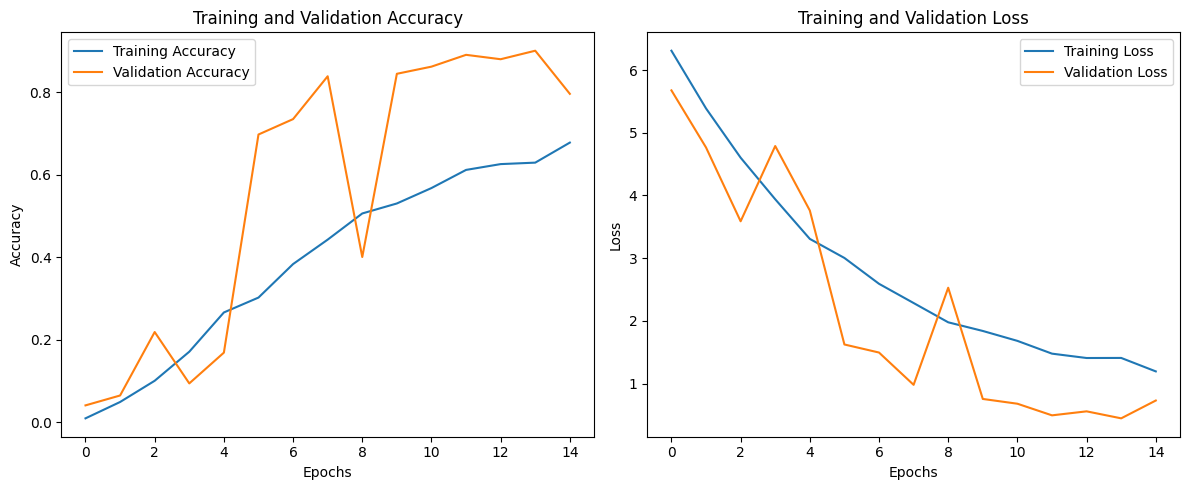

In [36]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plot function
plot_history(history)
